<img src="https://www.dropbox.com/s/l93ecugg1jbtjiw/fga.png?raw=1" width="1200" height="400">
<ul>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/3) Atividade Prática Avaliativa
    Entrega da Atividade 27/07/2022 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 10 (quinze) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes na B3, e separe os 30 (cinquenta) ativos mais líquidos; </li><p></p>
    <li> Construa amostras de treinamento e outras de teste, sendo a primeira com os 3 (três) anos e a segunda com o último ano, e desloque as janelas anualmente (walk forward analysis); </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz nos ativos separados, na fase de treinamento, na amostra de teste que representa o último ano da aquisição e compare com o índice Bovespa; </li><p></p>
    <li> Descreva suas impressores relativas ao processo, baseado em números, e resultados encontrados. </li>
</ol>
</div>


### Questão 1: 

# Extração
As ações utilizadas para a análise foram extraidas de forma geral de um próprio site da b3 que pode ser encontrado <a href="https://www.b3.com.br/pt_br/market-data-e-indices/indices/acoes-por-indice/" target="_top">aqui</a>. Para a reprodução do método utilizado, basta baixar a planilha, e efetuar as análises conforme demonstrado abaixo

In [2]:
!pip install pandas
!pip install investpy
!pip install seaborn
!pip install lxml
!pip install html5lib
!pip install tqdm
!pip install pandas_datareader

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd

In [4]:
stock_based_on_index = pd.read_csv('AcoesPorIndice.csv',sep=";")
stock_based_on_index.head()

,Empresa,Codigo,indices dos quais participa
0,3M,MMMC34,BDRX
1,3R PETROLEUM,RRRP3,"IBOV,IBRA,IBXX,IGCT,IGCX,IGNM,ITAG,IVBX,SMLL"
2,3TENTOS,TTEN3,"AGFS,IBRA,ICON,IGCT,IGCX,IGNM,ITAG,SMLL"
3,AB INBEV,ABUD34,BDRX
4,ABB LTD,A1BB34,BDRX


In [5]:
# Retira a coluna de empresa do dataframe
stock_based_on_index.drop('Empresa', axis=1, inplace=True)
stock_based_on_index.head(20)

,Codigo,indices dos quais participa
0,MMMC34,BDRX
1,RRRP3,"IBOV,IBRA,IBXX,IGCT,IGCX,IGNM,ITAG,IVBX,SMLL"
2,TTEN3,"AGFS,IBRA,ICON,IGCT,IGCX,IGNM,ITAG,SMLL"
3,ABUD34,BDRX
4,A1BB34,BDRX
5,ABTT34,BDRX
6,ABBV34,BDRX
7,ABCB4,"IBRA,IDIV,IFNC,IGCT,IGCX,ITAG,SMLL"
8,ACNB34,BDRX
9,ATVI34,BDRX


# Selecionando os codigos dos ativos dos 5 indices com maior liquidez

In [6]:
import operator
dic = {}
myList = []
for i in stock_based_on_index['indices dos quais participa']:
    for j in i.split(","):
        if j in dic.keys():
            dic[j] += 1
        else:
            dic[j] = 1
sorted_d = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
indexes = list(sorted_d)[0:5]


In [7]:
print('Índices filtrados: %s' % indexes)

Índices filtrados: ['BDRX', 'IGCX', 'ITAG', 'IBRA', 'IGCT']


In [8]:
stock_list = []
i = 0
while i != stock_based_on_index.shape[0]:
    if stock_based_on_index['indices dos quais participa'][i] in indexes:
        stock_list.append(stock_based_on_index['Codigo'][i])
    i += 1
stock_list

['MMMC34',
 'ABUD34',
 'A1BB34',
 'ABTT34',
 'ABBV34',
 'ACNB34',
 'ATVI34',
 'ADBE34',
 'A1AP34',
 'A1MD34',
 'A1EG34',
 'A1ES34',
 'AIRB34',
 'A1KA34',
 'A1LB34',
 'A1RE34',
 'BABA34',
 'A1LG34',
 'A1LN34',
 'ALPA3',
 'GOGL34',
 'GOGL35',
 'A1YX34',
 'MOOO34',
 'AMZO34',
 'A2MC34',
 'A1CR34',
 'A1MX34',
 'AALL34',
 'AXPB34',
 'T1OW34',
 'AMGN34',
 'A1UA34',
 'A1PA34',
 'A1IV34',
 'AAPL34',
 'A1MT34',
 'ARMT34',
 'ASML34',
 'A1ZN34',
 'T1AM34',
 'ATTB34',
 'A1UT34',
 'A1TH34',
 'A1VB34',
 'BAHI3',
 'BIDU34',
 'B1SA34',
 'BGIP3',
 'BGIP4',
 'BOAC34',
 'B1CS34',
 'BERK34',
 'BBYY34',
 'B2YN34',
 'B1IL34',
 'BIIB34',
 'BIOM3',
 'B1NT34',
 'BLAK34',
 'S2QU34',
 'BONY34',
 'BOEI34',
 'BKNG34',
 'BOXP34',
 'B1SX34',
 'B1PP34',
 'BMYB34',
 'B1TI34',
 'AVGO34',
 'B1AM34',
 'C1CL34',
 'CATP34',
 'CEDO3',
 'CLSC3',
 'CHCM34',
 'CHVX34',
 'L1FC34',
 'C1HI34',
 'C1IC34',
 'CSCO34',
 'CTGP34',
 'COCA34',
 'C2OI34',
 'COLG34',
 'CMCS34',
 'COPH34',
 'C1TV34',
 'C1GP34',
 'COWC34',
 'CTNM4',
 'COTY3

Agora iremos baixar as cotações das ações que separamos anteriormente

In [9]:
from pandas_datareader import DataReader
from tqdm import tqdm

In [10]:
start_date = '2012-07-01'
final_date = '2022-07-01'

In [11]:
daily_quotes = pd.DataFrame()
daily_volume = pd.DataFrame()
symbols = []
errors = []
for symbol in tqdm(stock_list):
    
    if not symbol.endswith('.SA'):
        symbol_sa = "%s.SA" % symbol
    else:
        symbol_sa = symbol
        
    try:
        df = DataReader(symbol_sa, 'yahoo', start_date, final_date)

        close_price = df["Adj Close"]
        volume = df["Volume"]
        symbols.append(symbol)

        daily_quotes = pd.concat([daily_quotes, close_price], axis=1)
        daily_volume = pd.concat([daily_volume, volume], axis=1)

        daily_quotes.columns = symbols
        daily_volume.columns = symbols
    except:
        errors.append(symbol)
        
print('Não foi possível baixar corretamente as cotações dos seguinte ativos: %s' % errors)

100%|██████████| 289/289 [09:14<00:00,  1.92s/it]

Não foi possível baixar corretamente as cotações dos seguinte ativos: ['L1YG34', 'W1BD34']


Erros: 366604.
Ativos com valores vazios: ['ABUD34', 'A1BB34', 'ABBV34', 'ACNB34', 'ATVI34', 'ADBE34', 'A1AP34', 'A1MD34', 'A1EG34', 'A1ES34', 'AIRB34', 'A1KA34', 'A1LB34', 'A1RE34', 'BABA34', 'A1LG34', 'A1LN34', 'GOGL34', 'GOGL35', 'A1YX34', 'MOOO34', 'A2MC34', 'A1CR34', 'A1MX34', 'AALL34', 'T1OW34', 'A1UA34', 'A1PA34', 'A1IV34', 'A1MT34', 'ASML34', 'A1ZN34', 'T1AM34', 'A1UT34', 'A1TH34', 'A1VB34', 'BIDU34', 'B1SA34', 'B1CS34', 'BERK34', 'BBYY34', 'B2YN34', 'B1IL34', 'BIIB34', 'B1NT34', 'BLAK34', 'S2QU34', 'BONY34', 'BKNG34', 'BOXP34', 'B1SX34', 'B1PP34', 'BMYB34', 'B1TI34', 'AVGO34', 'B1AM34', 'C1CL34', 'CHCM34', 'L1FC34', 'C1HI34', 'C1IC34', 'C2OI34', 'CMCS34', 'C1TV34', 'C1GP34', 'COWC34', 'COTY34', 'C1OU34', 'C1SU34', 'CRIP34', 'CVSH34', 'DHER34', 'D1DG34', 'DEEC34', 'DEAI34', 'DBAG34', 'D1VN34', 'D1EX34', 'DEXP4', 'DEOP34', 'F1AN34', 'D1LR34', 'D1OC34', 'DGCO34', 'D1OW34', 'E1TN34', 'E1CO34', 'EAIN34', 'E1OG34', 'EQIX34', 'E1QN34', 'E1QR34', 'E1RI34', 'E1SS34', 'ELCI34', 'F1NI34'

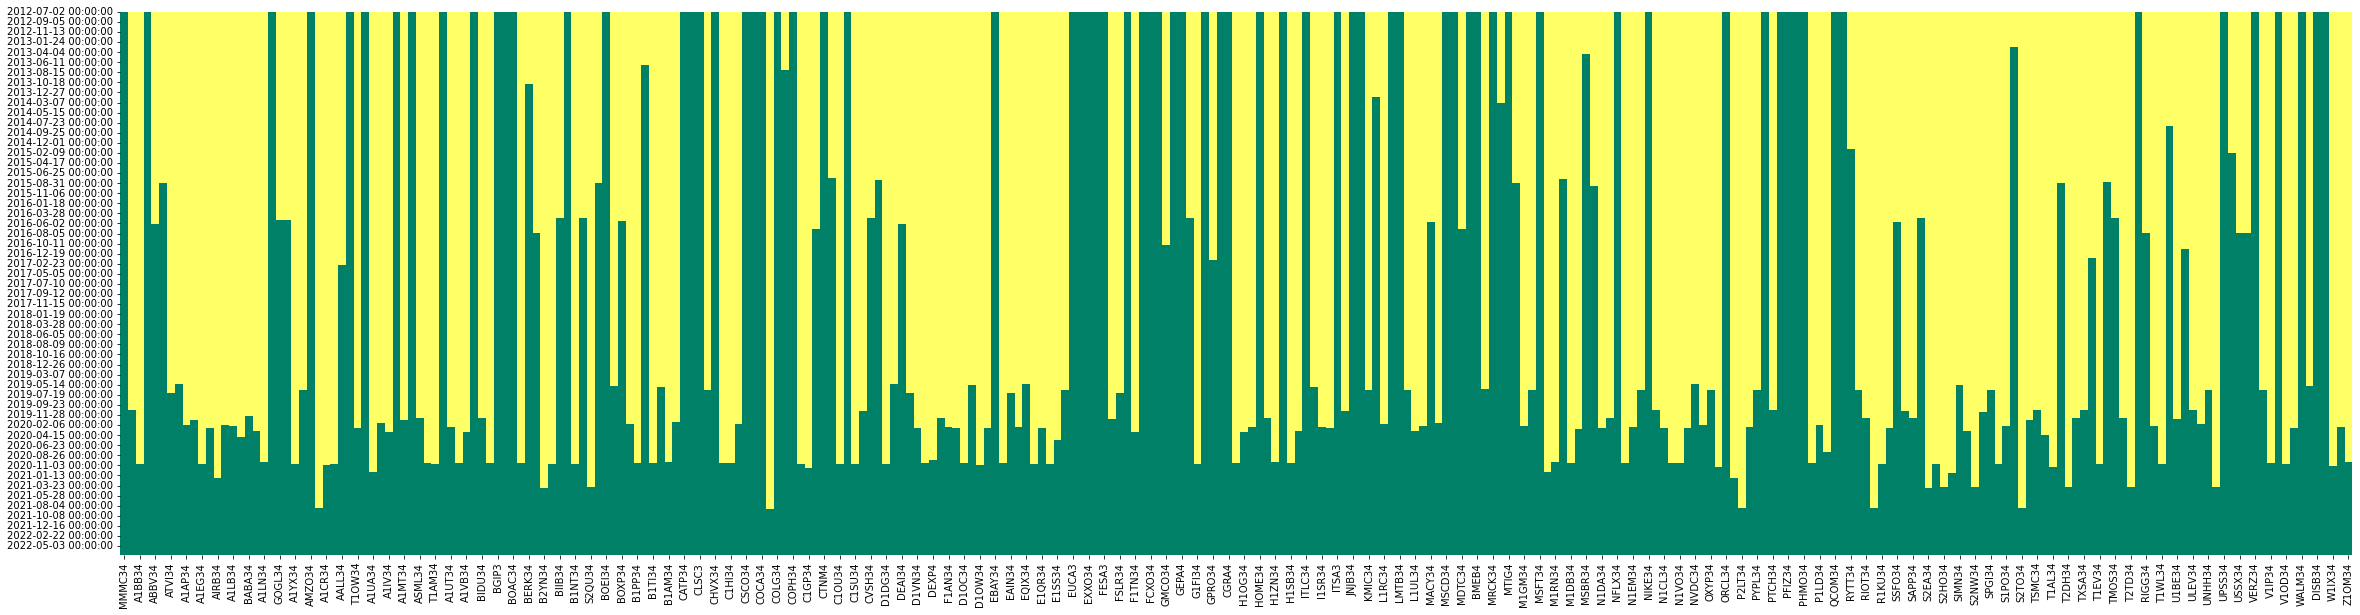

In [12]:
plt.figure(figsize=(40,10))

sns.heatmap(daily_quotes.isnull(),  cbar=False, cmap = 'summer')
columns_with_na = daily_quotes.columns[daily_quotes.isna().any()].tolist()

print("Erros: %s.\nAtivos com valores vazios: %s" % (np.sum(daily_quotes.isnull().sum()), columns_with_na))

In [13]:
valid_stocks_quotes = daily_quotes.dropna(axis=1)
valid_stocks_volume = daily_volume.dropna(axis=1)

Separando agora somente os 30 ativos com maior liquidez

In [14]:
qtd_stocks = 30
high_volume_stocks_sym = valid_stocks_volume.mean().sort_values(ascending=False).head(qtd_stocks).index.tolist()

In [15]:
stock_quotes = valid_stocks_quotes[high_volume_stocks_sym].copy()
stock_quotes

,AMZO34,ITSA3,FRAS3,AAPL34,MSFT34,EUCA4,DISB34,VISA34,BMEB4,HOME34,...,BOAC34,MRCK34,WALM34,PGCO34,PEPB34,NIKE34,ITLC34,RAPT3,ALPA3,MCDC34
2012-07-02,0.146417,4.079167,6.895244,3.580489,0.205528,5.395181,2.176876,0.703354,0.920893,1.229531,...,3.399662,3.584700,5.212872,6.596379,2.355937,1.479987,3.931007,5.374439,7.012279,4.751341
2012-07-03,0.146417,4.152383,6.895244,3.580489,0.205528,5.347294,2.176876,0.703354,0.915379,1.229531,...,3.399662,3.584700,5.212872,6.596379,2.355937,1.479987,3.931007,5.038537,7.228040,4.751341
2012-07-04,0.146417,4.183761,6.895244,3.580489,0.212209,5.307390,2.176876,0.703354,0.896473,1.229531,...,3.399662,4.034449,5.212872,6.570059,2.355937,1.479987,3.964387,5.044757,7.465377,4.644052
2012-07-05,0.146417,4.183761,6.895244,3.768053,0.212209,5.203636,2.176876,0.703354,0.898836,1.229531,...,3.399662,4.034449,5.212872,6.570059,2.355937,1.479987,3.964387,5.187828,7.335922,4.649163
2012-07-06,0.146417,4.044303,6.895244,3.710107,0.207257,5.227579,2.176876,0.703354,0.898836,1.229531,...,3.399662,4.034449,5.212872,6.570059,2.355937,1.479987,3.964387,5.038537,7.335922,4.649163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27,3.780000,9.060000,9.842046,73.809998,57.560001,8.090000,33.520000,53.119999,9.970000,52.520000,...,42.020000,61.509998,40.419998,53.330002,57.590000,57.490002,33.560001,8.310000,17.850000,64.169998
2022-06-28,3.580000,9.030000,9.762754,72.330002,56.240002,8.230000,33.500000,52.180000,9.950000,50.880001,...,42.400002,60.660000,40.230000,53.139999,57.639999,54.230000,33.169998,8.290000,17.850000,63.930000
2022-06-29,3.610000,8.930000,9.673552,72.150002,56.139999,8.130000,32.990002,51.650002,9.990000,50.689999,...,41.250000,59.860001,39.400002,52.630001,57.580002,53.529999,32.200001,8.480000,17.360001,64.129997
2022-06-30,3.540000,8.860000,9.713197,71.279999,55.820000,7.960000,33.049999,51.389999,9.950000,51.180000,...,40.580002,59.400002,39.650002,53.610001,58.020000,53.790001,32.310001,8.050000,17.400000,63.830002


In [16]:
print("Os %s ativos mais líquidos:\n%s" % (qtd_stocks, stock_quotes.columns.tolist()))

Os 30 ativos mais líquidos:
['AMZO34', 'ITSA3', 'FRAS3', 'AAPL34', 'MSFT34', 'EUCA4', 'DISB34', 'VISA34', 'BMEB4', 'HOME34', 'JNJB34', 'MSCD34', 'JPMC34', 'PFIZ34', 'CATP34', 'PTNT4', 'CTNM4', 'COCA34', 'BIOM3', 'CGRA4', 'BOAC34', 'MRCK34', 'WALM34', 'PGCO34', 'PEPB34', 'NIKE34', 'ITLC34', 'RAPT3', 'ALPA3', 'MCDC34']


### Questão 2: 

In [17]:
from datetime import datetime

initial_data_train = stock_quotes.index.min()
final_date_train = datetime(year=2015, month=7, day=1)

train_stocks = stock_quotes[(stock_quotes.index >= initial_data_train) & (stock_quotes.index <= final_date_train)].copy()

In [18]:
initial_data_test = datetime(year=2015, month=7, day=1) 
final_date_test = stock_quotes.index.max()

test_stocks = stock_quotes[(stock_quotes.index >= initial_data_test) & (stock_quotes.index <= final_date_test)].copy()

### Questão 3: 

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import random

train_return_pct = 100*train_stocks.pct_change()

In [20]:
stocks_sym = train_return_pct.columns
X = np.array([[np.std(train_return_pct[st]), np.mean(train_return_pct[st])] for st in stocks_sym])

In [21]:
def elbow_analysis(X, type_dataset):
    inertias_X = []

    for i in range(1, 30):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        inertias_X.append(kmeans.inertia_)
    
    return inertias_X

    plt.plot(range(1, 30), inertias_X)
    plt.title('Análise de Elbow %s' % type_dataset)
    plt.xlabel('Número de clusters')
    plt.ylabel('WCSS')
    plt.show()

In [22]:
def cluster_analysis(X, num_clusters, type_dataset='', plot=True):

    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
    y_predict = kmeans.predict(X)

    centers = kmeans.cluster_centers_
    
    if(plot):
        plt.scatter(X[:, 0], X[:, 1], c=y_predict)
        print("Silhoutte score: %s"% silhouette_score(X, y_predict))
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2)
        plt.title('Clusterização valores %s' % type_dataset)
        plt.show()
    
    return kmeans, y_predict



In [23]:
X_std = StandardScaler().fit_transform(X)

X_minmax = MinMaxScaler().fit_transform(X)

datasets = {
    'Sem normalização': X,
    'StandardScaler': X_std,
    'MinMaxScaler': X_minmax
}


In [24]:

for key, dataset in datasets.items():
    elbow_analysis(dataset, key)


Silhoutte score: 0.5672181594890204


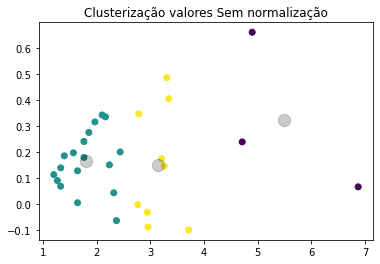

Silhoutte score: 0.3782926157845753


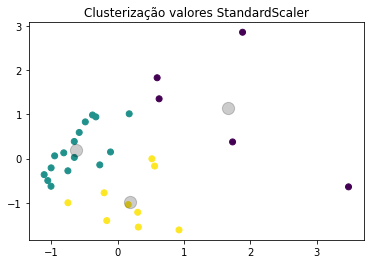

Silhoutte score: 0.37698030274931366


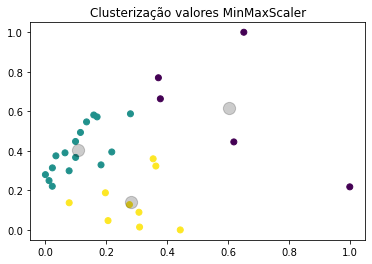

In [25]:
for key, dataset in datasets.items():
    cluster_analysis(dataset, 3, key)



In [26]:


kmeans, y_predict = cluster_analysis(X, 3, plot=False)



In [27]:
bests = []
for i in range(y_predict.max() + 1):
    stocks_on_cluster_i = train_return_pct[train_return_pct.columns[np.where(y_predict==i)[0]]]
    
    ind = stocks_on_cluster_i.mean() / stocks_on_cluster_i.std()
    bests.append(ind[ind == np.max(ind)].index.tolist()[0])

In [28]:


print('Os melhores ativos de cada cluster: %s' % bests)



Os melhores ativos de cada cluster: ['MSCD34', 'NIKE34', 'MSFT34']


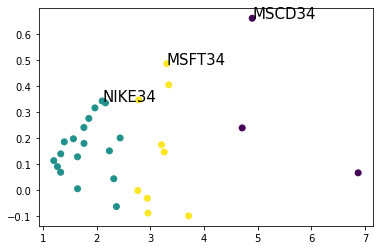

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y_predict)
stocks = train_return_pct.columns

for best in bests:
    best_std_return = X[stocks == best]
    plt.text(best_std_return[0][0], best_std_return[0][1], best, fontsize=15)

In [30]:


def portfolios(ret,ports):
    retp=[]
    risp=[]
    C=ret.cov()
    MU=ret.mean()
    SIG=ret.std()
    N=len(ret.columns)
    for i in tqdm(range(ports)):
        q = [random.randint(0,10000) for i in range(1,N+1)]
        s = sum(q)
        q = [ i/s for i in q ]

        retp.append(np.dot(pd.DataFrame(q).transpose(),MU)[0])
        risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])
    return retp, risp, SIG, MU
    
retp, risp, SIG, MU=portfolios(train_return_pct[bests],1000)



100%|██████████| 1000/1000 [00:00<00:00, 2443.57it/s]


Text(0.5, 1.0, '1000 Portifolios')

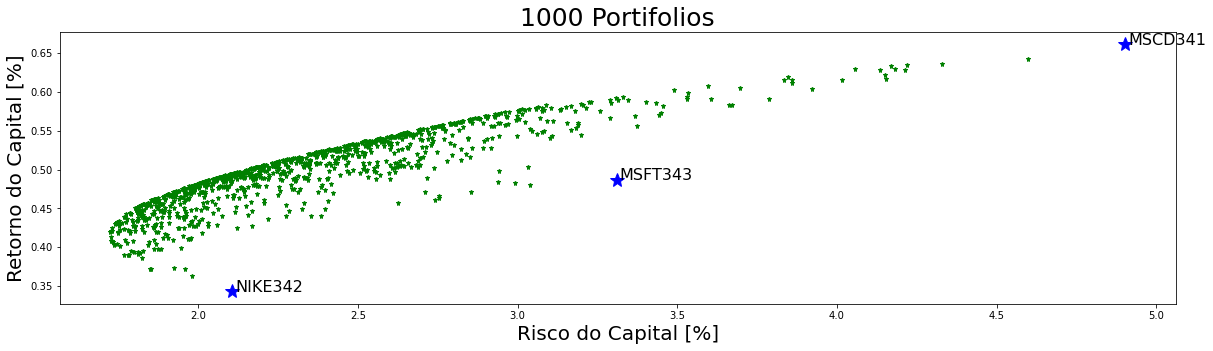

In [31]:
fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1)     
for p in range(0,len(retp)):
    ax1.plot(risp[p], retp[p], 'g*', markersize=5.0)  
    #ax1.text(100*(SIG[p]+0.001), 100*MU[p],df.columns[p], fontsize=8)

for p in range(0,len(SIG)):
    ax1.plot(SIG[p], MU[p], 'b*', markersize=15.0) 
    ax1.text(SIG[p]+0.01, MU[p],bests[p]+str(p+1) , fontsize=16)

ax1.set_ylabel("Retorno do Capital [%]",fontsize=20)
ax1.set_xlabel("Risco do Capital [%]",fontsize=20)
ax1.set_title(str(len(retp))+" Portifolios",fontsize=25)

In [32]:


def TPM_Fronteira(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    target_mus=np.arange(-0.5,1.0,0.002)
    risk_at_target_mus=np.zeros(len(target_mus))
    for i in tqdm(range(0, len(target_mus))):
        target_mu=target_mus[i]
        v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
        v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
        v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
        opt_q=(v1+v2)/v3
        risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
    return risk_at_target_mus, target_mus

risk_at_target_mus, target_mus = TPM_Fronteira(train_return_pct[bests],1000)



100%|██████████| 750/750 [00:00<00:00, 2757.34it/s]


Text(0.5, 0, 'Risco do Capital [%]')

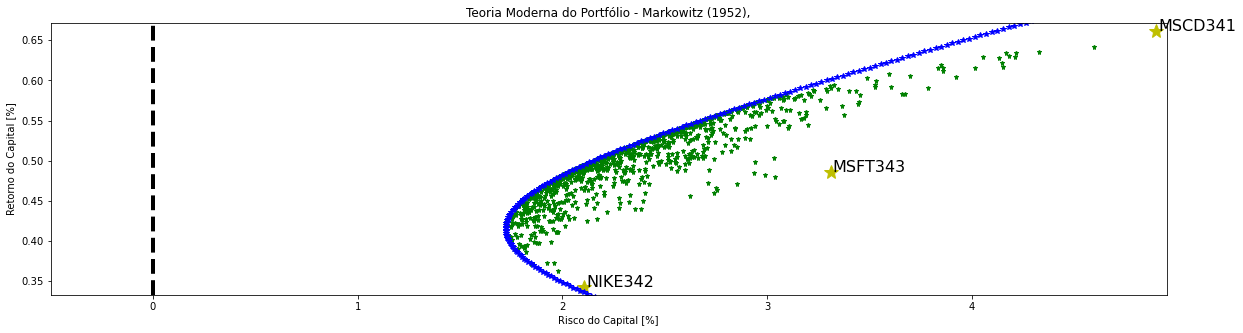

In [33]:


fig = plt.subplots(figsize=(20,5))
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.01])
plt.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],bests[p]+str(p+1) , fontsize=16)

plt.plot(risk_at_target_mus,target_mus,'b*')
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital [%]')
plt.xlabel('Risco do Capital [%]')



### Questão 4: 

In [34]:
# melhores ativos identificados no passo anterior
bests

['MSCD34', 'NIKE34', 'MSFT34']

In [35]:
ativos = train_stocks[bests]
ativos

,MSCD34,NIKE34,MSFT34
2012-07-02,0.135159,1.479987,0.205528
2012-07-03,0.135159,1.479987,0.205528
2012-07-04,0.135159,1.479987,0.212209
2012-07-05,0.187263,1.479987,0.212209
2012-07-06,0.187263,1.479987,0.207257
...,...,...,...
2015-06-25,9.212698,15.513875,5.269883
2015-06-26,9.212698,15.989996,5.279893
2015-06-29,8.950294,15.989996,5.279893
2015-06-30,8.950294,15.989996,5.279893


In [36]:
# retornos
melhoresAtivos = train_return_pct[bests]
melhoresAtivos

,MSCD34,NIKE34,MSFT34
2012-07-02,NaN,NaN,NaN
2012-07-03,0.000000,0.000000,0.000000
2012-07-04,0.000000,0.000000,3.250815
2012-07-05,38.549556,0.000000,0.000000
2012-07-06,0.000000,0.000000,-2.333373
...,...,...,...
2015-06-25,0.000000,0.000000,-0.245646
2015-06-26,0.000000,3.069001,0.189952
2015-06-29,-2.848291,0.000000,0.000000
2015-06-30,0.000000,0.000000,0.000000


In [ ]:
# Menor Risco

In [37]:
def TPM_Menor_Risco(ret):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    q_minrisk=np.dot(np.linalg.inv(C),pd.DataFrame(ONE))/d
    mu_minrisk=np.dot(q_minrisk.transpose(),MU.values)
    risk_minrisk=(np.dot(np.dot(pd.DataFrame(q_minrisk).transpose(),C),pd.DataFrame(q_minrisk)))**0.5
    return q_minrisk,mu_minrisk,risk_minrisk

q_minrisk,mu_minrisk,risk_minrisk = TPM_Menor_Risco(ret=melhoresAtivos)


Os pesos dos ativos no portifólio de menor risco: [0.12, 0.64, 0.24]



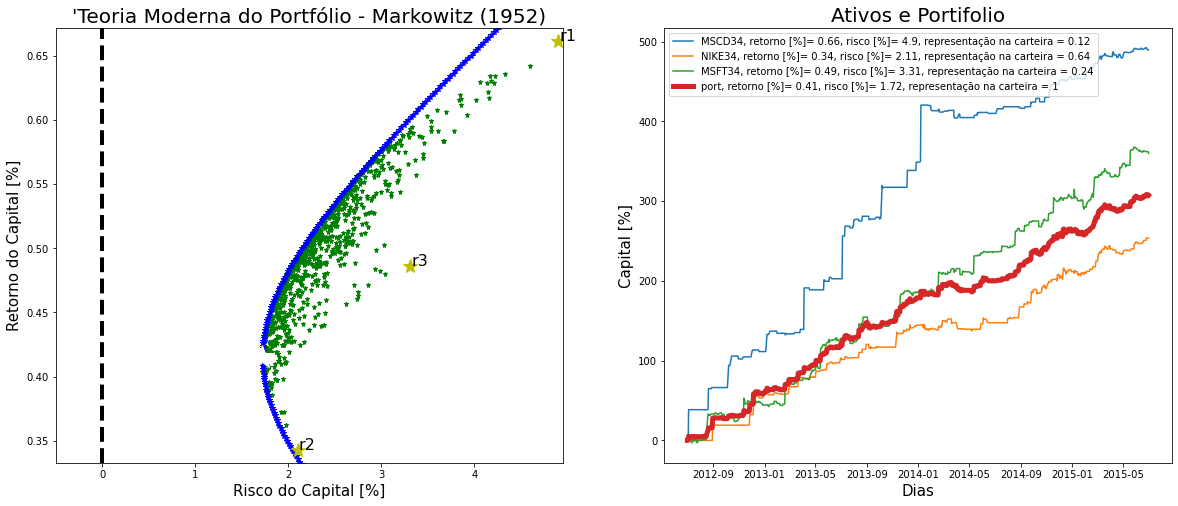

In [38]:
fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 

for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'w*',markersize=25)

plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.01])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ret=melhoresAtivos
ret['port']=pd.DataFrame(ret*[q_minrisk[i][0] for i in range(len(q_minrisk))]).sum(axis=1)
pesos=[q_minrisk[i][0] for i in range(len(q_minrisk))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  
ax2.legend(loc='upper left')


ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(q_minrisk[i][0],2) for i in range(len(q_minrisk))])
print()


ret=ret.drop(columns=['port'])

In [39]:
pesos = [round(q_minrisk[i][0],2) for i in range(len(q_minrisk))]
np.sum(pesos)

1.0

In [40]:
capital = 100000

st_in_1 = round(pesos[0]*capital/ativos[ativos.columns[0]].iloc[0])
st_in_2 = round(pesos[1]*capital/ativos[ativos.columns[1]].iloc[0])
st_in_3 = round(pesos[2]*capital/ativos[ativos.columns[2]].iloc[0])
st_in = [st_in_1,st_in_2,st_in_3]
print('Qtd papeis: ', st_in)

Qtd papeis:  [88784, 43244, 116773]


In [41]:
# Primeiro dia
np.sum([ativos[ativos.columns[i]].iloc[0]*st for i,st in zip(range(3),st_in)])

100000.63792042434

In [42]:
# Último dia
np.sum([ativos[ativos.columns[i]].iloc[-1]*st for i,st in zip(range(3),st_in)])

2089283.5373506546

In [ ]:
# Maior Sarpe

In [43]:
def TPM_Maior_Sharpe(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    rf=0.2
    temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
    qm=temp/temp.sum()
    mu_m=np.dot(qm.transpose(),MU)
    sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
    return qm,mu_m,sigma_m

qm,mu_m,sigma_m = TPM_Maior_Sharpe(ret,1000)


Os pesos dos ativos no portifólio de menor risco: [0.26, 0.4, 0.34]



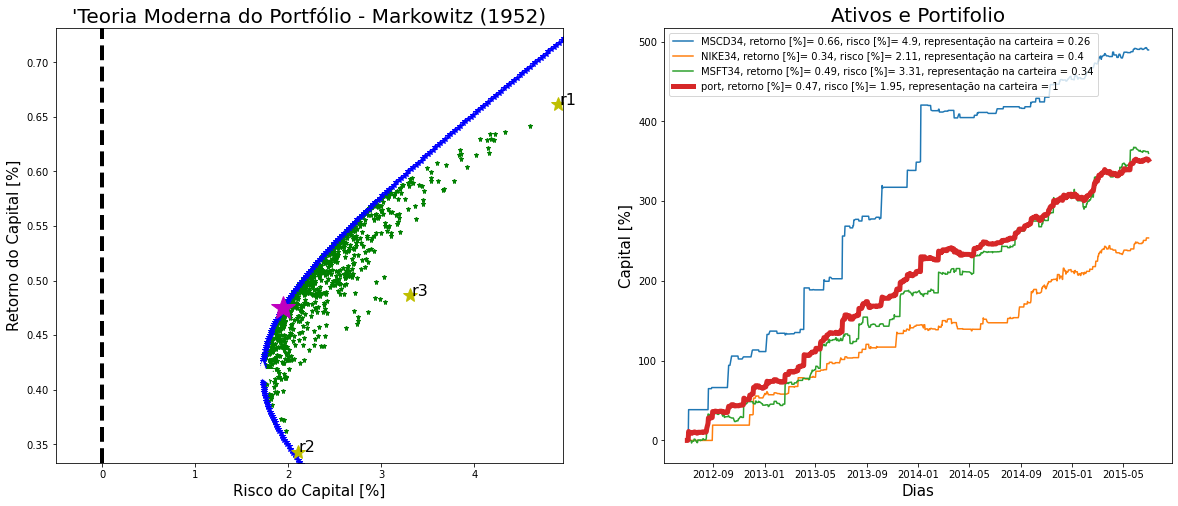

In [44]:
fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'w*',markersize=25)

ax1.plot(sigma_m,mu_m,'m*',markersize=25)


plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.07])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ret['port']=pd.DataFrame(ret*[qm[i][0] for i in range(len(qm))]).sum(axis=1)
pesos=[qm[i][0] for i in range(len(qm))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  

ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(qm[i][0],2) for i in range(len(qm))])
print()


ret=ret.drop(columns=['port'])

In [45]:
pesos = [round(qm[i][0],2) for i in range(len(qm))]
np.sum(pesos)

1.0

In [46]:
capital = 100000

st_in_1 = round(pesos[0]*capital/ativos[ativos.columns[0]].iloc[0])
st_in_2 = round(pesos[1]*capital/ativos[ativos.columns[1]].iloc[0])
st_in_3 = round(pesos[2]*capital/ativos[ativos.columns[2]].iloc[0])
st_in = [st_in_1,st_in_2,st_in_3]
print('Qtd papeis: ', st_in)

Qtd papeis:  [192365, 27027, 165428]


In [47]:
# Primeiro dia
np.sum([ativos[ativos.columns[i]].iloc[0]*st for i,st in zip(range(3),st_in)])

99999.58180253208

In [48]:
# Último dia
np.sum([ativos[ativos.columns[i]].iloc[-1]*st for i,st in zip(range(3),st_in)])

3008372.5136728287

### Questão 5: 

In [125]:
import yfinance as yf

test_stocks_bests_pct = test_stocks[bests].pct_change() * 100

ibov = yf.Ticker("^BVSP")
index_ibov = ibov.history(start="2015-07-01", end=final_date)

In [126]:
# Rentabilidade otimizada para sharpe

sharpe_opt = test_stocks_bests_pct.copy()
sharpe_opt['carteira_sharpe'] = sharpe_opt.dot(qm.flatten())
sharpe_return_cum = sharpe_opt.cumsum()

In [127]:
print('Rentabilidade da carteira otimizada para sharpe: %s' % sharpe_return_cum['carteira_sharpe'][-1])

Rentabilidade da carteira otimizada para sharpe: 209.43450455416493


<AxesSubplot:>

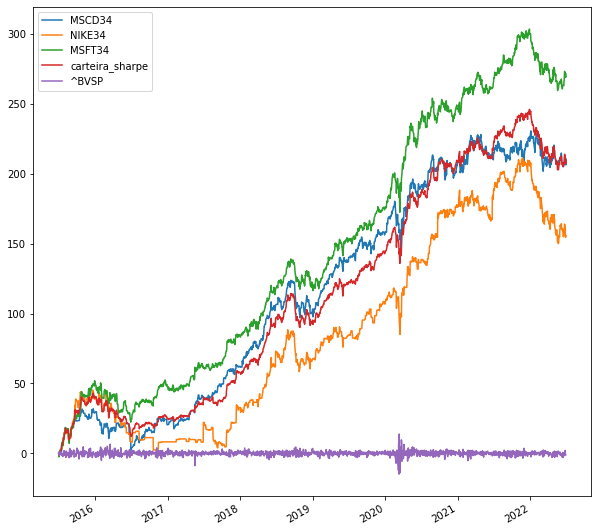

In [128]:
sharpe_return_cum["^BVSP"] = index_ibov['Close'].pct_change() * 100
sharpe_return_cum.plot(figsize=(10, 10))

In [129]:
#Rentabilidade otimizada para menor risco
low_risk_opt = test_stocks_bests_pct.copy()
low_risk_opt['carteira_menor_risco'] = low_risk_opt.dot(q_minrisk.flatten())
low_risk_opt_cum = low_risk_opt.cumsum()

In [130]:
print('Rentabilidade da carteira para menor risco: %s' % low_risk_opt_cum['carteira_menor_risco'][-1])

Rentabilidade da carteira para menor risco: 190.16616477458055


<AxesSubplot:>

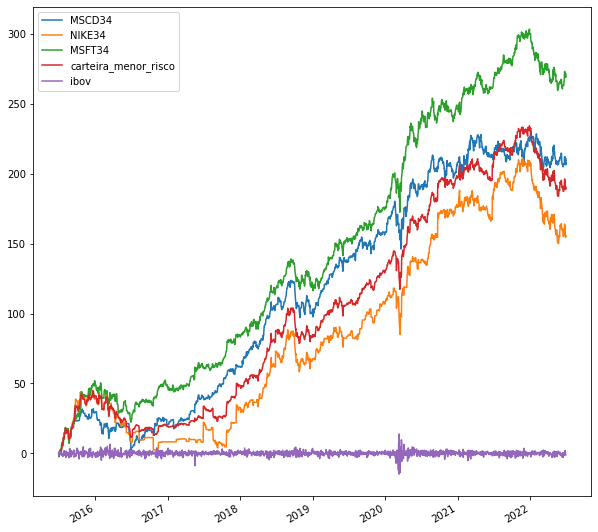

In [131]:
low_risk_opt_cum['ibov'] = index_ibov["Close"].pct_change() * 100
low_risk_opt_cum.plot(figsize=(10, 10))

### Questão 6: 